$$CONCEITO$$

- **KNN** = Classifica um dado através da distância de K vizinhos(dados) mais próximos dele.



- **Célula Voronoi** = Cria uma Região geométrica ao redor de cada ponto de dado, para assim conseguir identificar um outro ponto de dado mais próximo a ele, com isso pode-se criar fronteiras que melhor forma a separação entre as classes de dados, porém a técnica é muito sensível a outliers


- **Lazy Classifier** =Não existe treinamento, pois o algoritimo faz a previsão através das distâncias entre as features, dadas novas amostras independentes, o que vai prevalecer é a distância entre as variáveis preditoras


$$CARACTERISTICAS:$$

- **1° Definir a métrica para o cálculo da distância (Euclidiana, Minkowski, Manhattan, Hamming, etc)**


- **2° Definir o valor de K (Numero de vizinhos mais próximos que serão considerados pelo algoritimo)**


- **Aprendizagem não paramétrica**


- **Dados Precisam estar normalizados, as medidas de distância são sensíveis a escala dos dados** 

$$Distâncias (Metricas):$$

**Conceito:**

**Antes de definir o K vizinhos mais próximos dos dados, precisamos saber quais metricas usamos para calcular as distancias entre os pontos**

- **Euclidiana** = É a distância em linha reta entre dois pontos de dados no espaço euclidiano, também é chamada de norma L2 ou distância L2.


- **Minkowski** = Forma generalizada da distância euclidiana e da distância de Manhattan, é normalmente usada com 'p' sendo 1 ou 2, que corresponde à distância de Manhattan e à distância euclidiana, respectivamente.


- **Manhattan** = É a soma das diferenças absolutas de suas coordenadas cartesianas, também é chamada com nomes diferentes, distância L1, norma L1, distância da cobra, distância do quarteirão da cidade, etc 


- **Hamming** = É usada para lidar com atributos categóricos, verifica se 2 atributos são iguais ou não, quando são iguais a distância é 0, caso contrário será 1.


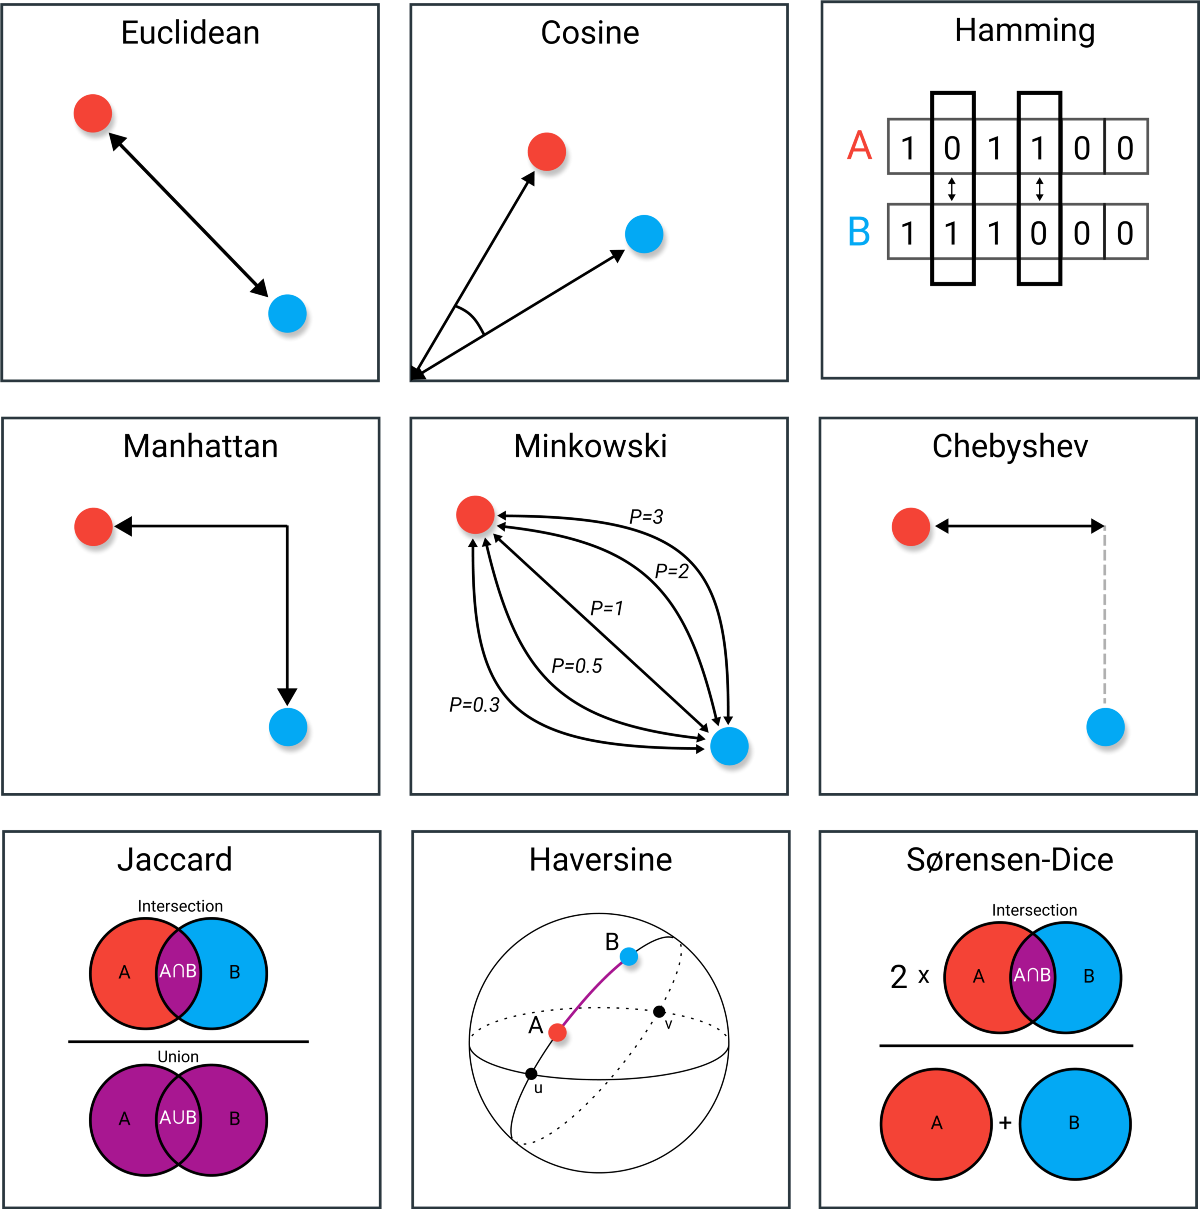

In [1]:
#Tipos de Distâncias
from IPython.display import Image
Image(filename="metric.png")

## Objetivo: Identificar qual tipo de classe pertence os vinhos (Classes: Pinot Noir,Cabernet, ou Merlot) através das 13 features usando o método de distância KNN

In [2]:
#Pacotes
import pandas as pd
import sklearn.datasets  as dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

# Carregar Banco de dados

In [3]:
#Dataset Wine
wine = dataset.load_wine()

x = pd.DataFrame(wine.data,columns=wine.feature_names)
y = pd.DataFrame(wine.target)

x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**São 13 features que explicam 3 tipos de classes de vinhos**

## Histograma da variável Target

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

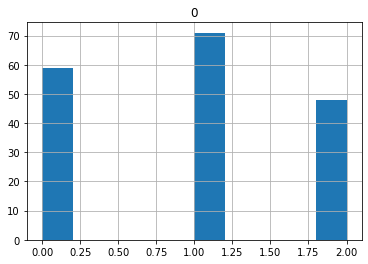

In [4]:
#Variável target
y.hist()

**Há um pequeno desbalanceamento das classes, porém não deve interferir no resultado final**

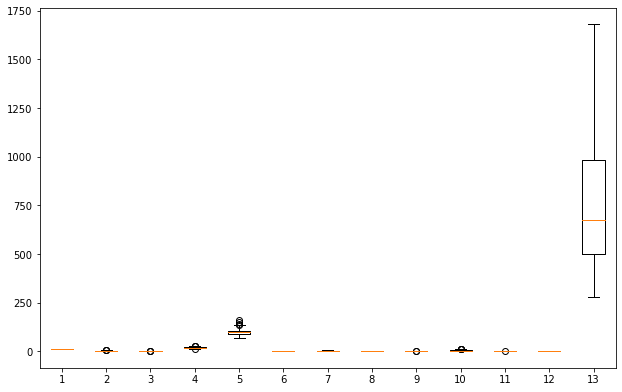

In [5]:
#BoxPlot
fig = plt.figure(figsize =(8, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(x)
 
# show plot
plt.show()

**Dados em escalas diferentes, precisamos dimensionalizar (Padronizar ou normalizar) os dados para ficarem na mesma escala**

# Padronização dos dados

In [6]:
#Padronizar os dados
padro_x = (x - x.mean()) /  x.std()
padro_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


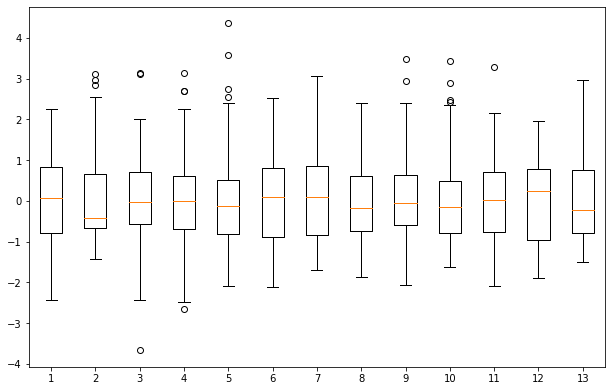

In [7]:
#BoxPlot
fig = plt.figure(figsize =(8, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(padro_x)
 
# show plot
plt.show()

**Note que agora os valores dos dados estão todos na mesma escala**

**Modelo KNN requer que os dados estejam padronizados, para que não haja desequilíbrio no cálculo das distancias nas features com valores maiores**

# Configuração dos hiperparâmetros:

# Definir o Parâmetro K:

**Vamos usar 3 metricas de distância para chegar no melhor valor de K**

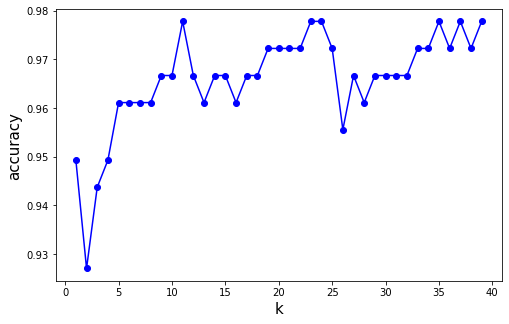

melhor k: 11 


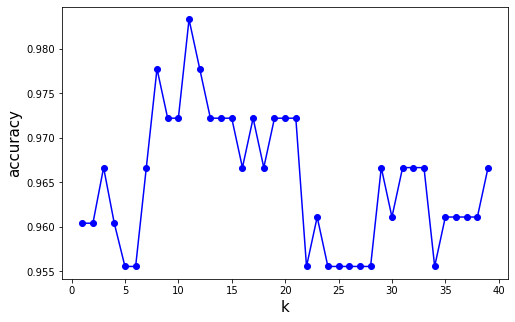

melhor k: 11 


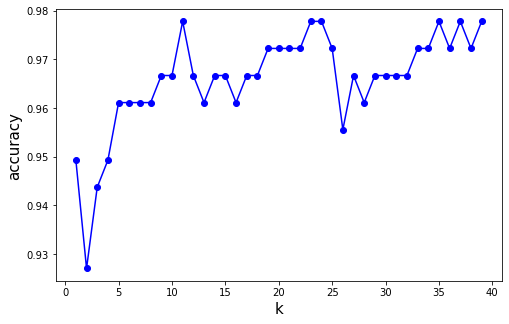

melhor k: 11 


In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

#euclidean
num_folds =20
vk =[]
vscore =[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    cv=cross_validate(model,padro_x,y,cv = num_folds)
    vscore.append(cv['test_score'].mean())
    vk.append(k)
    
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.plot(vk,vscore,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.show(True)
best_k=np.argmax(vscore)+1
print(f'melhor k: {best_k} ')


#manhattan
vk1 =[]
vscore1 =[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    cv=cross_validate(model,padro_x,y,cv = num_folds)
    vscore1.append(cv['test_score'].mean())
    vk1.append(k)
    
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.plot(vk1,vscore1,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.show(True)
best_k=np.argmax(vscore1)+1
print(f'melhor k: {best_k} ')


#minkowski
vk2 =[]
vscore2 =[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    cv=cross_validate(model,padro_x,y,cv = num_folds)
    vscore2.append(cv['test_score'].mean())
    vk2.append(k)
    
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.plot(vk2,vscore2,'-bo')
plt.xlabel('k',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.show(True)
best_k=np.argmax(vscore2)+1
print(f'melhor k: {best_k} ')

**Observamos que para o conjunto de dados Wine padronizado o melhor valor de K = 11**

## Definir a melhor distância através do score

**Vamos usar as mesmas 3 metricas de distância que usamos para encontrar o melhor valor de K**

In [31]:
#Método minkowski
import warnings
warnings.filterwarnings('ignore')

#GridSearchCV com KNN 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(metric='minkowski')
knn_cv= GridSearchCV(knn,param_grid,cv=20)
knn_cv.fit(padro_x,y)
print("Best Score: "+ str(round(knn_cv.best_score_*100,2)))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 97.78
Best Parameters: {'n_neighbors': 11}


**Método KNN com a métrica Minkowski**

In [32]:
#Método manhattan

import warnings
warnings.filterwarnings('ignore')

#GridSearchCV com KNN 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(metric='manhattan')
knn_cv= GridSearchCV(knn,param_grid,cv=20)
knn_cv.fit(padro_x,y)
print("Best Score: "+ str(round(knn_cv.best_score_*100,2)))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 98.33
Best Parameters: {'n_neighbors': 11}


**Método KNN com a métrica manhattan**

In [33]:
#Método euclidean
import warnings
warnings.filterwarnings('ignore')


#GridSearchCV com KNN 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(metric='euclidean')
knn_cv= GridSearchCV(knn,param_grid,cv=20)
knn_cv.fit(padro_x,y)
print("Best Score: "+ str(round(knn_cv.best_score_*100,2)))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 97.78
Best Parameters: {'n_neighbors': 11}


**Método KNN com a métrica euclidean**

## Conclusão:

**Entre as metricas: Euclidean, Manhattan e Minkowski a que apresentou a melhor acuracia foi: Manhattan, apesar de todas as metricas ficaram com os scores muito parecidos**

## Usando GridSearchCv  com todos os hiperparâmetros para encontrar o melhor modelo que se ajuste aos dados 

**Com o GridSearch conseguimos definir os melhores hiperparâmetros de uma só vez**

In [12]:
#Definir os hiperparâmetros para serem treinados
k_list =list(range(1,50))
weight_list=['uniform','distance']
p_list = [1,2,3]
metric1=['minkowski','manhattan','euclidean']

In [13]:
#Transforma os parâmetros em um dicionario
parametros = dict(n_neighbors=k_list,weights = weight_list,p =p_list ,metric =metric1 )

In [14]:
#Instanciar o modelo KNN
knn_grid = KNeighborsClassifier()

In [15]:
#Instanciar o modelo junto com GridSearch
grid = GridSearchCV(knn_grid,parametros,cv =5 , scoring='accuracy' )

In [16]:
#Mostrar todos os hiperparametros testados
grid.fit(padro_x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
#OS Melhores parâmetros encontrados com a melhor média de acurácia
print(f'Melhores parametros: {grid.best_params_},\n\nMelhor Mádia de Acurácia: {round(grid.best_score_,3)}')

Melhores parametros: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'},

Melhor Mádia de Acurácia: 0.978


## Agora que encontramos os melhores hiperparâmetros, vamos construir varios modelos com diferentes variáveis e encontrar a melhor acuracia entre eles

In [18]:
#Modelo 1 (Todas as variáveis padronizadas)

#Instanciar o modelo com os melhores parâmetros
knn_modelo1 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo1.fit(padro_x,y)

#Acuracia
acuracia = accuracy_score(y,knn_modelo1.predict(padro_x))
print(f'Acuracia dos dados de Treino: {acuracia*100:.1f}%')

Acuracia dos dados de Treino: 98.9%


# Avaliação do Modelo para os dados de Teste

## Matriz de confusão 

<AxesSubplot:>

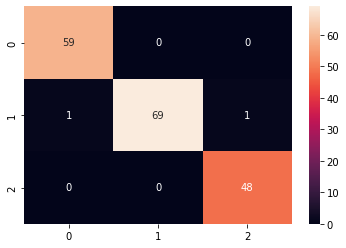

In [19]:
cm = confusion_matrix(y,knn_modelo1.predict(padro_x))
sns.heatmap(cm,annot=True,fmt='d')

In [20]:
#Acurácia
acuracia = accuracy_score(y,knn_modelo1.predict(padro_x))
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 98.9%


In [21]:
#Mêtricas de avaliação
from sklearn.metrics import classification_report
print(classification_report(y,knn_modelo1.predict(padro_x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.97      0.99        71
           2       0.98      1.00      0.99        48

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



**Note que o modelo obteve apenas 2 erros, isso significa que os dados se ajustaram bem ao algoritimo KNN e seus hiperparâmetros**

## Função para plotar o gráfico de fronteira de acordo com os números de vizinhos


### 1° Selecionar as 2 variáveis com mais correlação com a variável target para plotar no gráfico

In [34]:
#Correlação
x.join(y).corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


**As Variáveis são: flavanoids e diluted_wines**

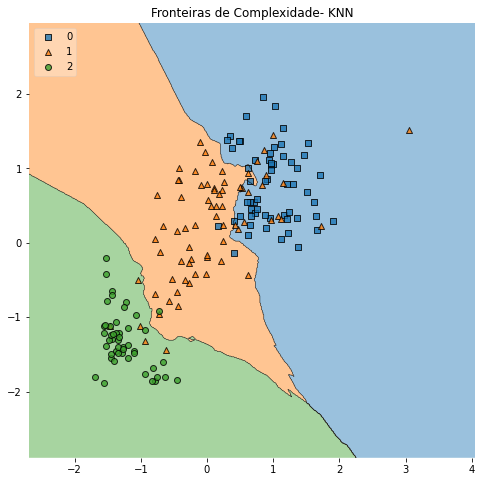

In [23]:
# Filtrar apenas as 2 features com mais correlação para serem plotadas no grafico bi-dimensional
xx = padro_x[['flavanoids','od280/od315_of_diluted_wines']].values
y = pd.DataFrame(y)
yy= y[0].values


from mlxtend.plotting import plot_decision_regions
def plot_fronteiras(n_vizinhos):
    knn =KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(xx,yy)
    plt.figure(figsize=(8,8))
    plot_decision_regions(xx,yy,clf=knn,legend=2)
    plt.title('Fronteiras de Complexidade- KNN')
    
#Plotar a fronteira com o numero de K vizinhos 
plot_fronteiras(11)

**Podemos ver visualmente como as variáveis foram bem separadas, lembrando que estamos plotando apenas 2 variáveis, em um total de 13 usadas no modelo**

## Vamos criar o modelo 2 selecionando apenas 5 variáveis do dataset que tem mais correlação com a variável target, independente do sinal da correlação e verificar se conseguimos ter uma acuracia melhor

In [24]:
#Correlação
cor = x.join(y).corr()
cor_5 = pd.DataFrame(cor.iloc[13,:].sort_values(ascending=True))
cor_5

,0
flavanoids,-0.847498
od280/od315_of_diluted_wines,-0.788230
total_phenols,-0.719163
proline,-0.633717
hue,-0.617369
proanthocyanins,-0.499130
alcohol,-0.328222
magnesium,-0.209179
ash,-0.049643
color_intensity,0.265668


In [25]:
#Selecionar as variáveis
var_x_5 = padro_x[['flavanoids','od280/od315_of_diluted_wines','total_phenols','proline','hue']]
var_x_5

,flavanoids,od280/od315_of_diluted_wines,total_phenols,proline,hue
0,1.031908,1.842721,0.806722,1.010159,0.361158
1,0.731565,1.110317,0.567048,0.962526,0.404908
2,1.212114,0.786369,0.806722,1.391224,0.317409
3,1.462399,1.180741,2.484437,2.328007,-0.426341
4,0.661485,0.448336,0.806722,-0.037767,0.361158
...,...,...,...,...,...
173,-1.420891,-1.227742,-0.982841,-0.021890,-1.388840
174,-1.280731,-1.481267,-0.791103,0.009866,-1.126341
175,-1.340800,-1.481267,-1.126646,0.279786,-1.607590
176,-1.350811,-1.396759,-1.030776,0.295664,-1.563840


In [26]:
#Criar o modelo 2 (As 5 principais variáveis padronizadas)

#Instanciar o modelo com os melhores parâmetros
knn_modelo2 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo2.fit(var_x_5,y)
acur_2 = knn_modelo2.score(var_x_5,y)
print(f'Acuracia: {round(acur_2*100,2)}%')

Acuracia: 94.38%


**Modelo teve uma performance um pouco menor em comparação com o modelo 1, porém agora com apenas 5 variáveis**

## Modelo 3, selecionar apenas as 2 variáveis que mais se correlacionam com a variável target

In [27]:
#Correlação
cor = x.join(y).corr()
cor_2 = pd.DataFrame(cor.iloc[13,:].sort_values(ascending=True))
cor_2

,0
flavanoids,-0.847498
od280/od315_of_diluted_wines,-0.788230
total_phenols,-0.719163
proline,-0.633717
hue,-0.617369
proanthocyanins,-0.499130
alcohol,-0.328222
magnesium,-0.209179
ash,-0.049643
color_intensity,0.265668


In [28]:
#Selecionar as 2 variáveis com mais correlação com a variável target
var_x_2 = padro_x[['flavanoids','od280/od315_of_diluted_wines']]
var_x_2

,flavanoids,od280/od315_of_diluted_wines
0,1.031908,1.842721
1,0.731565,1.110317
2,1.212114,0.786369
3,1.462399,1.180741
4,0.661485,0.448336
...,...,...
173,-1.420891,-1.227742
174,-1.280731,-1.481267
175,-1.340800,-1.481267
176,-1.350811,-1.396759


In [29]:
#Criar o modelo 3 (As 3 principais variáveis padronizadas)

#Instanciar o modelo com os melhores parâmetros
knn_modelo3 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo3.fit(var_x_2,y)
acur_3 = knn_modelo3.score(var_x_2,y)
print(f'Acuracia: {round(acur_3*100,2)}%')

Acuracia: 85.39%


**Agora com apenas 2 variáveis o modelo não conseguiu ter os mesmos resultados que os modelos anteriores, podemos concluir que falta variável explicativa para melhorar o modelo**

## Modelo 4, todas as variáveis com seus dados originais (sem padronização)

In [30]:
#Criar o modelo 4 (Todas as variáveis dos dataset sem padronização)

#Instanciar o modelo com os melhores parâmetros
knn_modelo4 = KNeighborsClassifier(n_neighbors=11 ,weights = 'uniform',p =1 ,metric ='minkowski')

#Treinar o modelo
knn_modelo4.fit(x,y)
acur_4 = knn_modelo4.score(x,y)
print(f'Acuracia: {round(acur_4*100,2)}%')

Acuracia: 82.02%


**Pior modelo, isso só reforça a importância de dimensionalizar as variáveis**

# Conclusão

**O Método KNN pode trazer bons resultados quando selecionamos as melhores variáveis preditoras numéricas, lembrando sempre de padronizar os dados, verificar o melhor número de K-vizinhos mais próximos e a melhor métrica de distância para ser usada, o Gridsearch pode ajudar neste caso pois conseguimos testar todas as possibilidades, criando os melhores hiperparâmetros para construir o melhor modelo generalizável**